# DimRed in action

### Perforing Dimension reduction on Iris dataset
Below code shows how to use `DimRed` package to perform dimension reduction, using various algorithms.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from dimred import DimRed

In [3]:
# Import dataset
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [4]:
# Check shape of input data
X.shape

(150, 4)

### Dimension Reduction with default algorithm: PCA()

In [5]:
# Reduce the matrix from 4 dimensions to 2
dimred = DimRed(n_components=2)
X_transf = dimred.fit_transform(X)

X_transf.shape

[dimred]: X is not sparse
[dimred]: X has 150 observations and 4 features
[dimred]: using sklearn PCA


(150, 2)

In [6]:
# Algorithm used to perform the dimension reduction (automatically picked)
dimred.algo

'sklearn_pca'

We can see the default algorithm `sklearn_pca` was used - it is using `decomposition.PCA()`

In [7]:
# Number of components
dimred.n_components_

2

In [8]:
# Principal Components: 2 vectors
dimred.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [9]:
# Explained Variance
dimred.explained_variance_ratio_

array([0.92461872, 0.05306648])

### Dimension Reduction with specified algorithm: dimred_svd()

Now, try to specify an algorithm and run the same
We will use the internally built SVD algorithm

In [10]:
dimred = DimRed(algo='dimred_svd', n_components=2)
X_transf = dimred.fit_transform(X)
X_transf.shape

[dimred]: X is not sparse
[dimred]: X has 150 observations and 4 features
[dimred]: using DimRed implementation of SVD for PCA


(150, 2)

In [11]:
# Algorithm used to perform the dimension reduction (automatically picked)
dimred.algo

'dimred_svd'

In [12]:
# Number of components
dimred.n_components_

2

In [13]:
# Principal Components: 2 vectors
dimred.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

We can see the internally build SVD algorithm provides the same results as scikit learn PCA()

### Plot the original data and the reduced data - manually

In [14]:
X.shape

(150, 4)

In [15]:
# Load the data
import matplotlib.pyplot as plt
iris = datasets.load_iris()
features = iris.data
target = iris.target


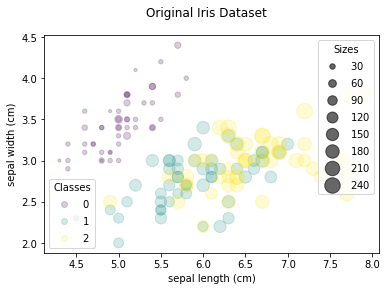

In [16]:
# Plot Original data picking the first 3 features
# Sepal Length, Sepal Width, Petal Length and Petal Width.
fig, ax = plt.subplots()
fig.suptitle('Original Iris Dataset')
scatter = ax.scatter(features[:,0], features[:,1], alpha=0.2,
                s=100*features[:,3], c=target, cmap='viridis')

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")


[dimred]: X is not sparse
[dimred]: X has 150 observations and 4 features
[dimred]: using DimRed implementation of SVD for PCA


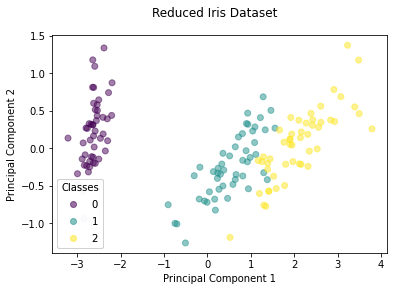

In [17]:
# Plot Reduced data with 2 components
dimred = DimRed(algo='dimred_svd', n_components=2)
X_transf = dimred.fit_transform(X)

fig, ax = plt.subplots()
fig.suptitle('Reduced Iris Dataset')
scatter = ax.scatter(X_transf[:,0], X_transf[:,1], c=target, alpha=0.5, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
#ax.legend

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)


Text(0, 0.5, 'Principal Component 2')

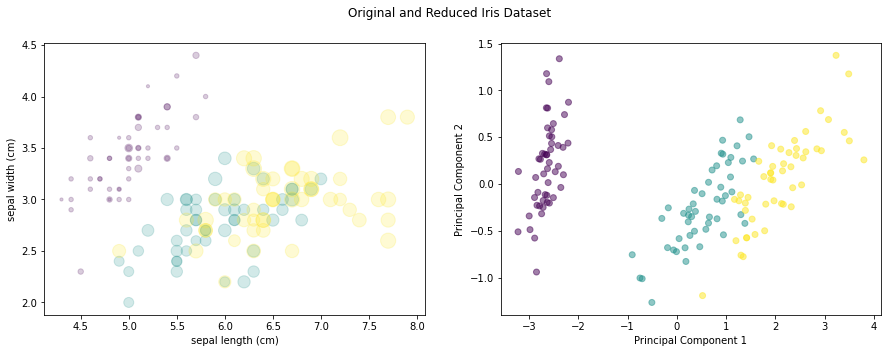

In [18]:
# Original and Reduced data as 1 plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Original and Reduced Iris Dataset')
ax[0].scatter(features[:,0], features[:,1], alpha=0.2,
            s=100*features[:,3], c=target, cmap='viridis')
ax[1].scatter(X_transf[:,0], X_transf[:,1], c=target, alpha=0.5, cmap='viridis')

ax[0].set_xlabel(iris.feature_names[0])
ax[0].set_ylabel(iris.feature_names[1])
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

### Using DimRed now

In [19]:
# Load the data
import matplotlib.pyplot as plt
iris = datasets.load_iris()
features = iris.data
target = iris.target


In [20]:
# Reduce it to 2 and 3 dimensions
dimred2 = DimRed(algo='dimred_svd', n_components=2)
X_transf2 = dimred2.fit_transform(X)

dimred3 = DimRed(algo='dimred_svd', n_components=3)
X_transf3 = dimred3.fit_transform(X)


[dimred]: X is not sparse
[dimred]: X has 150 observations and 4 features
[dimred]: using DimRed implementation of SVD for PCA
[dimred]: X is not sparse
[dimred]: X has 150 observations and 4 features
[dimred]: using DimRed implementation of SVD for PCA


In [21]:
X_transf2.shape

(150, 2)

In [22]:
X_transf3.shape

(150, 3)

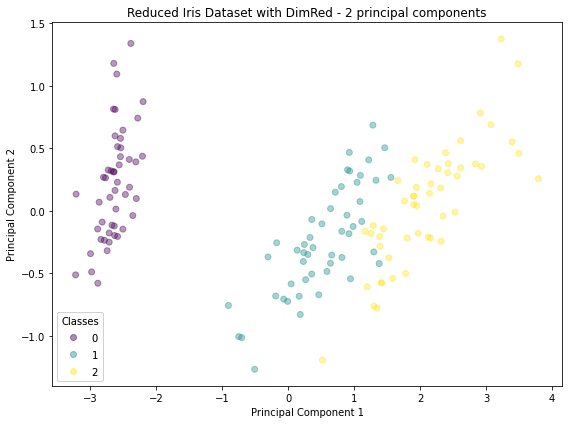

In [23]:
# Plot with DimRed - 2d
fig2, ax2 = dimred2.draw_scatterplot(X_transf2, y=target, 
                                     PC=2, 
                                     title='Reduced Iris Dataset with DimRed - 2 principal components', 
                                     figsize=(8, 6), 
                                     legend=True)
plt.show()

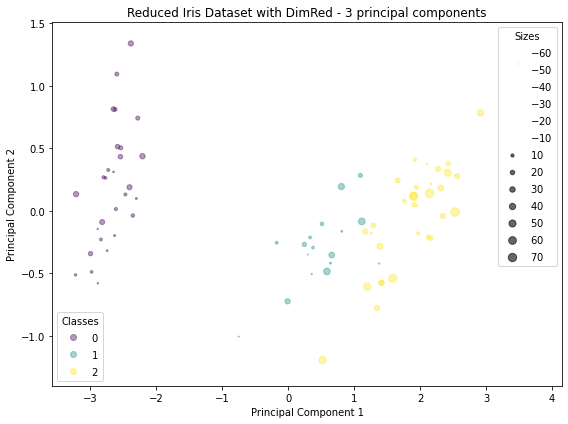

In [24]:
# Plot with DimRed - 3d
fig3, ax3 = dimred3.draw_scatterplot(X_transf3, y=target, 
                                     PC=3, 
                                     title='Reduced Iris Dataset with DimRed - 3 principal components', 
                                     figsize=(8, 6), 
                                     legend=True)
plt.show()